In [27]:
import pandas as pd
import numpy as np

stack_overflow = pd.read_feather('datasets/stack_overflow.feather')

H0: The mean compensation (in USD) is the same for those that coded first as a child and those that coded first as an adult  

HA: The mean compensation (in USD) is **greater** for those that coded first as a child compared to those that coded first as an adult

HA: µchild > µadulst

HA: µchild - µadult > 0

In [28]:
mean_values = stack_overflow.groupby('age_first_code_cut')['converted_comp'].mean()

xbar_child = mean_values['child']
xbar_adult = mean_values['adult']

print(f'xbar_child: {xbar_child}')
print(f'xbar_adult: {xbar_adult}')

xbar_child: 132419.5706214689
xbar_adult: 111313.31104651163


### Test statistics
sample mean estimates the population mean  
X̅ - a sample mean  
X̅child - sample mean compensation for coding first as a child  
X̅adult - sample mean compensation for coding first as an adult  

X̅child - X̅adult   a test statistic


#### Standardizing the text statistic

z = (sample stat - population parameter) / standard error


t = (difference in sample stats - difference in population parameters) / standard error

t = ((X̅child - X̅adult) - (µchild - µadult)) / SE(X̅child - X̅adult)

SE = sqr((s^2child / nchild) + (s^2adult / nadult))

s = standard deviation of the variable

n = is the sample size (number of observations in sample)

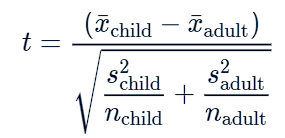

In [29]:
std_values = stack_overflow.groupby('age_first_code_cut')['converted_comp'].std()

s_child = std_values['child']
s_adult = std_values['adult']


print(s_child)
print(s_adult)

255585.2401149758
271546.5217287417


In [30]:
n = stack_overflow.groupby('age_first_code_cut')['converted_comp'].count()

n_child = n['child']
n_adult = n['adult']

In [32]:

numerator = xbar_child - xbar_adult
denominator = np.sqrt(s_child**2/n_child + s_adult**2/n_adult)

t_stat = numerator / denominator 

print(f't_stat: {t_stat}')

t_stat: 1.8699313316221844


### Calculatin p-values from t-statistics

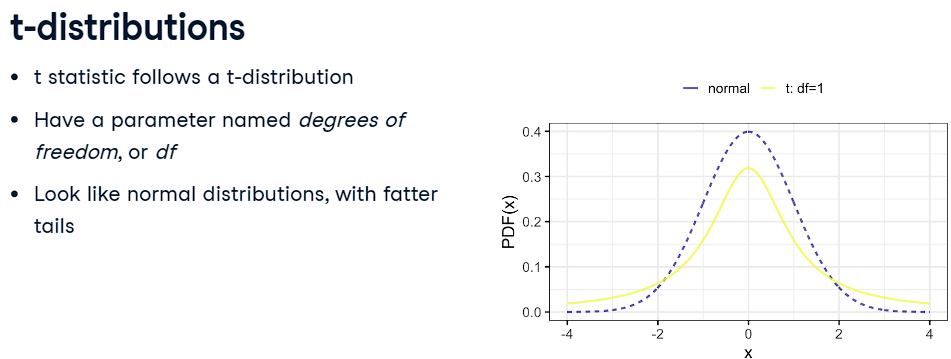  

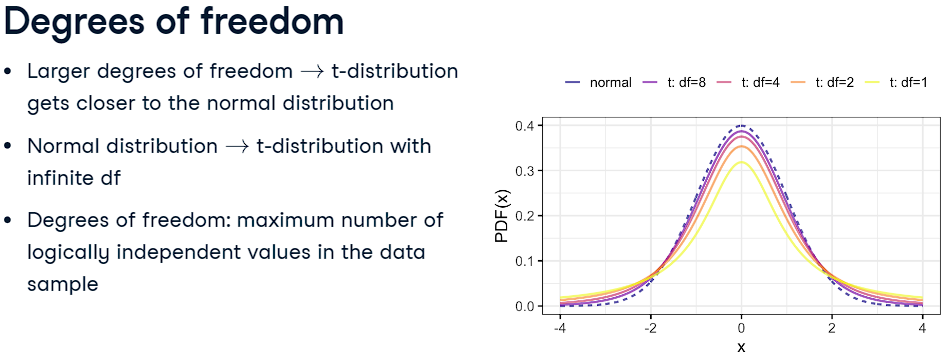

In [39]:
#* T statistic follows a t-distribution
from scipy.stats import t

alpha = 0.1

#* Degrees of freedom
degrees_of_freedom = n_child + n_adult - 2
print(f'degrees_of_freedom: {degrees_of_freedom}\n')


p_value = 1 - t.cdf(t_stat, df=degrees_of_freedom)
print(f'p_value: {p_value}')

print('We reject the null hypothesis') if p_value < alpha else print('We fail to reject the null hypothesis')

degrees_of_freedom: 2259

p_value: 0.030811302165157595
We reject the null hypothesis


---------------------------------------------------------------------------------------------------------------------------------------------------------

## Paired t-test

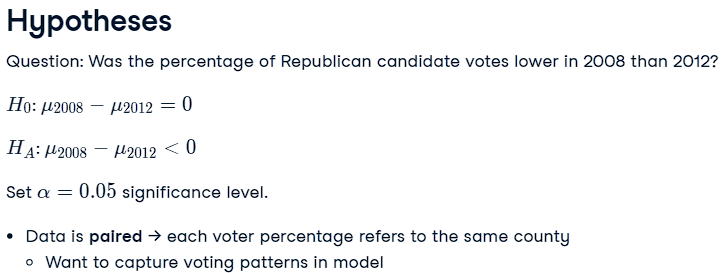

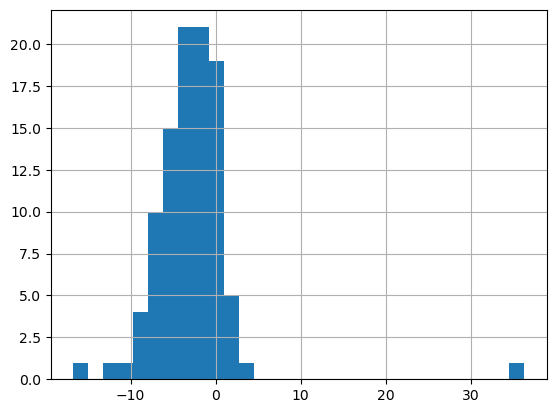

In [43]:
from altair import sample
import matplotlib.pyplot as plt
import seaborn as sns

repub_votes_potus_08_12 = pd.read_feather('datasets/repub_votes_potus_08_12.feather')

sample_data = repub_votes_potus_08_12

sample_data['diff'] = sample_data['repub_percent_08'] - sample_data['repub_percent_12']
sample_data['diff'].hist(bins=30)
plt.show()

In [45]:
x_bar = sample_data['diff'].mean()
print(x_bar)

-2.877109041242944


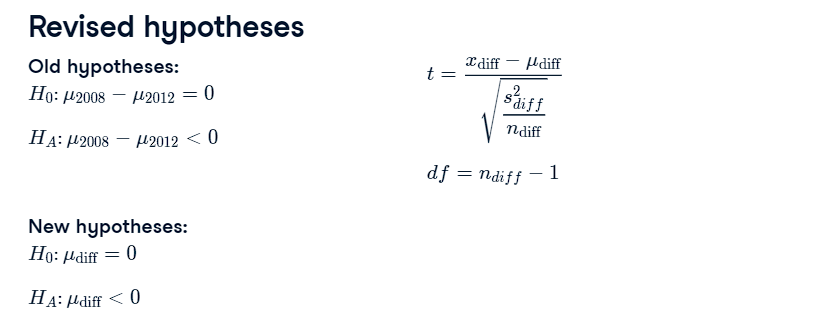

In [48]:
# define n for the sample
n_diff = len(sample_data)

# calculate the standard deviation and standard error
s_diff = sample_data['diff'].std()

t_stat = (x_bar - 0) / np.sqrt(s_diff**2 / n_diff)
print(t_stat)

-5.601043121928489


In [51]:
# calculate degrees of freedom
degrees_of_freedom = n_diff - 1

In [55]:
# calculate p-value
from scipy.stats import t

p_value = t.cdf(t_stat, df = degrees_of_freedom)

print(f'p-value: {p_value}\nSo, we fail to reject the null hypothesis')

p-value: 9.57253728527241e-08
So, we fail to reject the null hypothesis
